# Video timestamp retrieval
**Purpose**
    The purpose of this notebook is to figure out how to take a frame from an AVI video and use opencv to read the text at the bottom of the frame, and save a text file with the info for that file (timestamp, temperature)
    
**Outline and pseudocode**
1. Import a frame of the file
2. Read text using opencv
3. Parse text 
4. Save out txt file with the same name as the video.txt

5. Then make this into a function that can run on a file
6. Use it on a folder of AVI files

# Imports

In [73]:
import cv2
import numpy as np
import pandas as pd
import argparse
import time
from imutils.object_detection import non_max_suppression
import matplotlib.pyplot as plt
import pytesseract

In [72]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=664a35b4a29e0152f36f8d955718e252ee35746f3604b326aa3c55ea5ba7e229
  Stored in directory: /Users/emilydennis/Library/Caches/pip/wheels/e5/22/c8/c633fb88695e51343e8a57ea85995bd3c4fd02f110c2d4ac91
Successfully built pytesseract


# User inputs

In [170]:
# LATER CHANGE TO folder of videos
# folder_of_videos_path=''

# video
video_path='/Users/emilydennis/Desktop/05292021_07B_30.AVI'
output_filename = '/Users/emilydennis/Desktop/05292021_07B_30.txt'

# Define functions

In [184]:
output_filename.encode()

b'/Users/emilydennis/Desktop/05292021_07B_30.txt'

# Process
building off of these link/s:
* https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/
* if first time running, run:
`pip install --upgrade imutils` (add a ! to the beginning of !pip if using a notebook)

In [32]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", type=str, help="path to input image")
ap.add_argument("-east", "--east", type=str,help="path to input EAST text detector")
ap.add_argument("-c", "--min-confidence", type=float, default=0.5,help="minimum probability required to inspect a region")
ap.add_argument("-w", "--width", type=int, default=320,help="resized image width (should be multiple of 32)")
ap.add_argument("-e", "--height", type=int, default=320,help="resized image height (should be multiple of 32)")
args = vars(ap.parse_known_args()[0])
print(args)

{'image': None, 'east': None, 'min_confidence': 0.5, 'width': 320, 'height': 320}


'/Users/emilydennis/Desktop/05292021_07B_30.AVI'

In [35]:
# load the input image and grab the image dimensions
image = cv2.imread("/Users/emilydennis/Desktop/05292021_07B_30.AVI")
orig = image.copy()
(H, W) = image.shape[:2]
# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (args["width"], args["height"])
rW = W / float(newW)
rH = H / float(newH)
# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

In [45]:
cv2.getBuildInformation()

'\nGeneral configuration for OpenCV 4.5.1 =====================================\n  Version control:               unknown\n\n  Extra modules:\n    Location (extra):            /Users/runner/miniforge3/conda-bld/libopencv_1612623446098/work/opencv_contrib/modules\n    Version control (extra):     unknown\n\n  Platform:\n    Timestamp:                   2021-02-06T15:05:06Z\n    Host:                        Darwin 19.6.0 x86_64\n    CMake:                       3.19.4\n    CMake generator:             Ninja\n    CMake build tool:            /Users/runner/miniforge3/conda-bld/libopencv_1612623446098/_build_env/bin/ninja\n    Configuration:               Release\n\n  CPU/HW features:\n    Baseline:                    SSE SSE2 SSE3 SSSE3\n      requested:                 DETECT\n    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX\n      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX\n      SSE4_1 (15 files):         + SSE4_1\n      SSE4_2 (1 files):   

In [46]:
## trying dsomething else

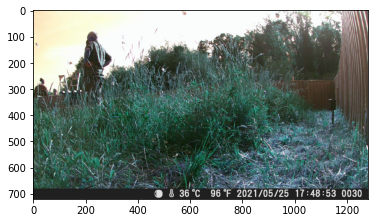

In [50]:
img = cv2.VideoCapture(video_path)
ret, frame = img.read()
plt.figure()
plt.imshow(frame)

In [80]:
f2 = frame.copy()

In [53]:
np.shape(f2)

(720, 1280, 3)

In [68]:
rect = cv2.rectangle(f2, (550,680), (1280,720), (0, 255, 0), 2)

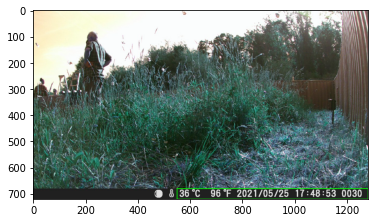

In [69]:
plt.imshow(rect)

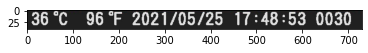

In [163]:
# crop image
cropped=f2[680:720,550:1280]

#plot
plt.imshow(cropped)

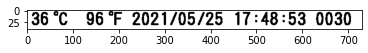

In [164]:
# make grayscale
gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
# threshold and binarize
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# plot
plt.imshow(thresh,cmap='gray')

In [165]:
# get text from image
text = pytesseract.image_to_string(thresh)
textlist = text.split()
print(textlist)

['96°F', '2021/05/25', '17:48:53', '0030']


In [166]:
# parse string into a data structure
data={}

for substr in textlist:
    if "F" in substr:
        data['F']=substr.split('°')[0]
    elif "C" in substr:
        data['C']=substr.split('°')[0]
    elif "2021" in substr:
        data['date']=textlist[1].split('/')[0]+textlist[1].split('/')[1]+textlist[1].split('/')[2]
    elif ":" in substr:
        data['time']=textlist[2].split(':')[0]+textlist[2].split(':')[1]+textlist[2].split(':')[2]
        
        
if 'C' not in data:
    data['C']=str(round((int(data['F'])-32)*(5/9)))
print(data)

{'F': '96', 'date': '20210525', 'time': '174853', 'C': '36'}


In [187]:
text_file = open(output_filename.encode(),"w+")
text_file.writelines(textlist)
text_file.close()
text_file = open(output_filename.encode(),"w+")
reading = text_file.readlines()
text_file.close()
print(reading)

[]


In [194]:
text_file = open(output_filename.encode(),"w+")
text_file.writelines(textlist)
text_file.close()

NameError: name 'text_list' is not defined